In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "D:\Raw"
DATADIR2= "D:\Sample2"
CATEGORIES = ["Ac_Altocumulus", "As_Altostratus", "Cc_Cirrocumulus","Ci_Cirrus", "Clear Sky", "Cs_Cirrostratus", "Cu_Cumulus", "Ns_Nimbostratus", "Sc_Stratocumulus", "St_Stratus"]

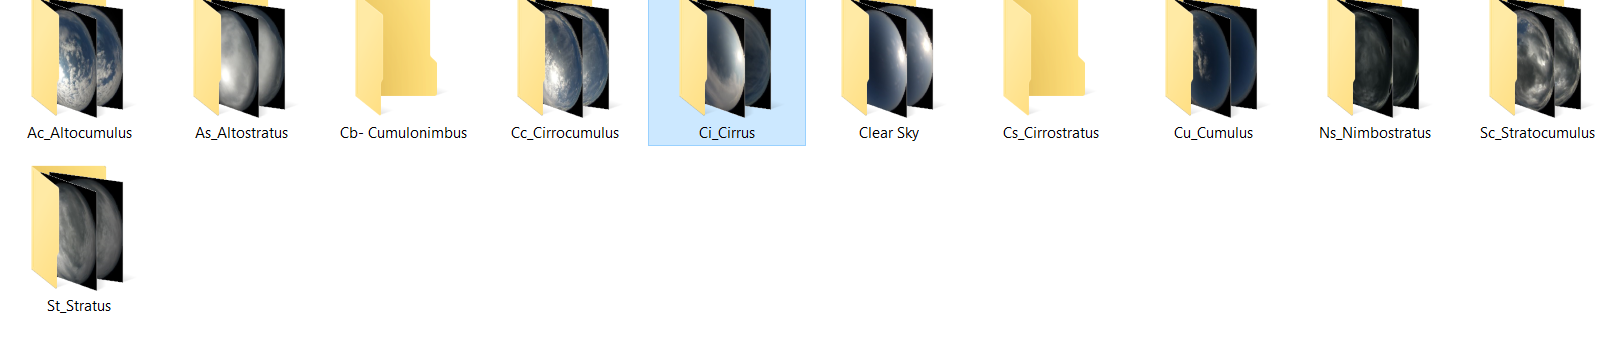

In [3]:
from IPython.display import Image, display
Image(filename="D:\Sample\sample_raw.png") #sample images from the dataset

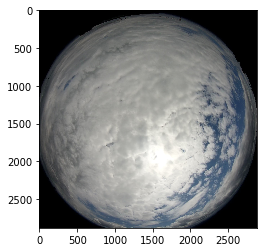

In [4]:
for category in CATEGORIES: #iteration to fetch images from directory  
    path = os.path.join(DATADIR,category)  # create path to cloud types from folder
    for img in os.listdir(path):  # iterate over each image in folder
        img_array2 = cv2.imread(os.path.join(path,img), -1)  # read the images and -1 flag is for CV2 flag 
        
        img_array = cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array, cmap='gray')  # graph
        plt.show()  # display!
        print
        break
    break 

In [5]:
print(img_array)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [6]:
print(img_array.shape)

(2880, 2880, 3)


In [7]:
IMG_SIZE = 125 #image resize to 125x125

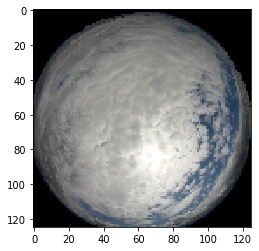

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 2],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 2],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 2],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [8]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
new_array

In [9]:
training_data = []


In [10]:
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to dataset
        class_num = CATEGORIES.index(category)  # assign index to cloud classes
        print(class_num)
        for img in tqdm(os.listdir(path)):  # iterate over each image per cloud classes
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

0


100%|██████████████████████████████████████████████████████████████████████████████████| 76/76 [00:10<00:00,  7.59it/s]


1


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:09<00:00,  8.00it/s]


2


100%|████████████████████████████████████████████████████████████████████████████████| 154/154 [00:20<00:00,  7.74it/s]


3


100%|████████████████████████████████████████████████████████████████████████████████| 161/161 [00:20<00:00,  7.74it/s]


4


100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [00:08<00:00,  8.03it/s]


5


100%|████████████████████████████████████████████████████████████████████████████████| 142/142 [00:17<00:00,  8.26it/s]


6


100%|██████████████████████████████████████████████████████████████████████████████████| 86/86 [00:11<00:00,  7.79it/s]


7


100%|████████████████████████████████████████████████████████████████████████████████| 135/135 [00:16<00:00,  8.00it/s]


8


100%|████████████████████████████████████████████████████████████████████████████████| 117/117 [00:15<00:00,  7.76it/s]


9


100%|██████████████████████████████████████████████████████████████████████████████████| 98/98 [00:12<00:00,  7.87it/s]


1114


In [26]:
import random

random.shuffle(training_data)

In [27]:
for sample in training_data[:100]: #random shuffle of cloud categorie images with class_labels
    print(sample[1])

3
0
2
6
4
8
1
3
6
5
8
9
5
2
6
2
5
8
1
3
3
0
5
7
1
8
2
2
2
0
8
8
2
4
5
5
7
9
1
8
4
7
5
3
8
5
3
4
6
3
8
5
2
9
8
0
2
3
5
9
3
9
2
3
4
7
1
5
7
6
3
3
7
3
0
7
0
0
4
9
8
2
2
5
0
5
8
3
8
4
9
5
9
6
2
5
2
9
8
7


In [28]:
X = [] #setting X as set of features
y = [] #setting Y as set of labels

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(np.min(y), np.max(y))

[[[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 1  1  1]
   [ 1  1  1]
   [ 2  2  2]
   ...
   [ 9 11 12]
   [ 9  9  9]
   [ 7  9  9]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 2  2  2]
   ...
   [ 8  6  6]
   [ 7  6  8]
   [ 6  5  7]]

  [[ 1  1  1]
   [ 2  2  2]
   [ 2  2  2]
   ...
   [10  5  6]
   [ 6  5  7]
   [ 7  6  8]]]]
0 9


In [29]:
import pickle #to save data



In [30]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle","rb") #to load data
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [31]:
import tensorflow as tf #experimental part results and please consider it as a play ground not effective code help needed
import keras
from sklearn.model_selection import train_test_split
from sklearn import metrics

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping

In [18]:
#X = X/255.0
#y=keras.utils.to_categorical(y, 5)

#x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)
#testimg = plt.imshow(x_test[50])

In [32]:
X = X/255.0

y=keras.utils.to_categorical(y, 10)
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

model = Sequential()
 
model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
 
#model.add(Dense(32))
 
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) #accuracy


result=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50)

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
#result=model.fit(x_train, y_train,validation_data=(x_test,y_test), callbacks=[monitor], verbose=2, epochs=200)


#result=model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor, checkpointer], verbose=0, epochs=20)
#result=model.fit(X, y, batch_size=32, epochs=50, validation_split=0.2)
#model.load_weights('best_weights.hdf5') #load weights for the best model

Train on 891 samples, validate on 223 samples
Epoch 1/50
891/891 [==============================] - ETA: 12s - loss: 2.3096 - acc: 0.06 - ETA: 11s - loss: 2.2775 - acc: 0.15 - ETA: 10s - loss: 2.2777 - acc: 0.18 - ETA: 10s - loss: 2.2749 - acc: 0.14 - ETA: 9s - loss: 2.2590 - acc: 0.1500 - ETA: 9s - loss: 2.2550 - acc: 0.145 - ETA: 8s - loss: 2.2396 - acc: 0.169 - ETA: 8s - loss: 2.2087 - acc: 0.191 - ETA: 7s - loss: 2.1769 - acc: 0.215 - ETA: 7s - loss: 2.1535 - acc: 0.215 - ETA: 6s - loss: 2.1104 - acc: 0.221 - ETA: 6s - loss: 2.0976 - acc: 0.221 - ETA: 6s - loss: 2.0834 - acc: 0.233 - ETA: 5s - loss: 2.0617 - acc: 0.232 - ETA: 5s - loss: 2.0211 - acc: 0.247 - ETA: 4s - loss: 1.9912 - acc: 0.261 - ETA: 4s - loss: 1.9712 - acc: 0.261 - ETA: 4s - loss: 1.9431 - acc: 0.272 - ETA: 3s - loss: 1.9410 - acc: 0.269 - ETA: 3s - loss: 1.9319 - acc: 0.275 - ETA: 2s - loss: 1.9087 - acc: 0.278 - ETA: 2s - loss: 1.8892 - acc: 0.275 - ETA: 1s - loss: 1.8695 - acc: 0.286 - ETA: 1s - loss: 1.8505 - 

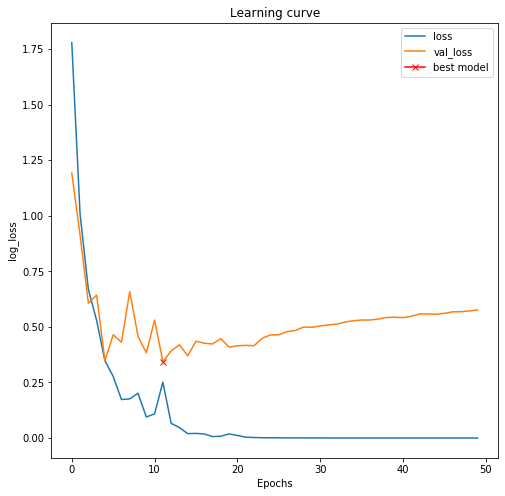

In [33]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(result.history["loss"], label="loss")
#plt.plot(result.history["acc"], label="acc")
#plt.plot(result.history["val_acc"], label="val_acc")
plt.plot(result.history["val_loss"], label="val_loss")
plt.plot( np.argmin(result.history["val_loss"]), np.min(result.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

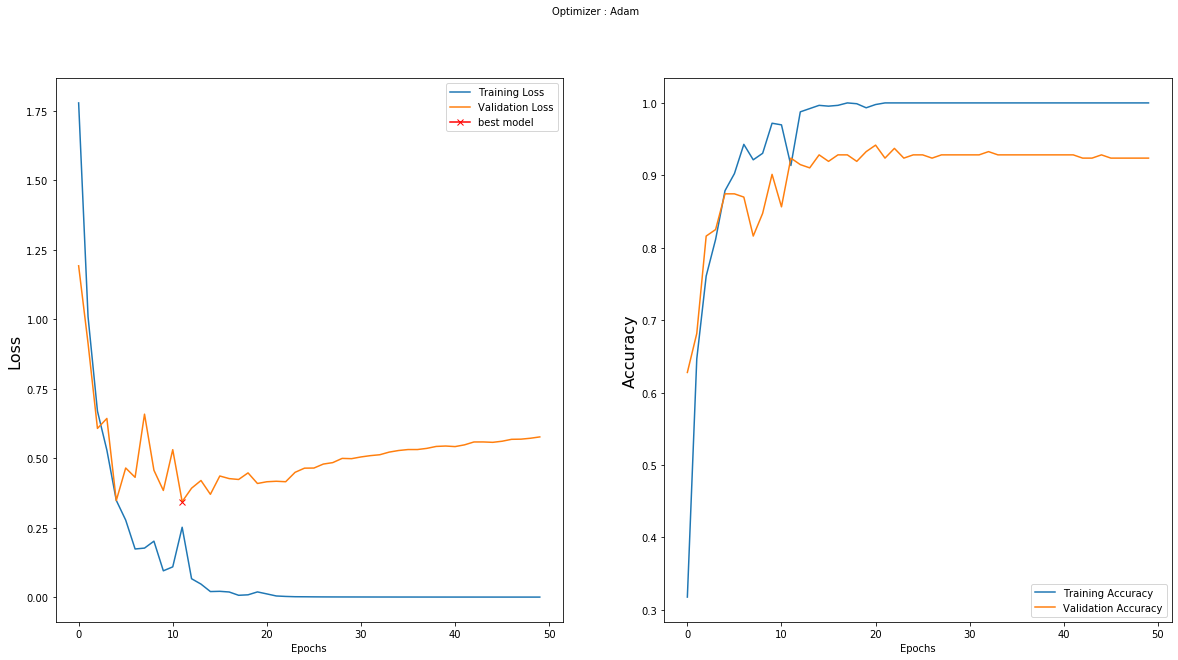

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.plot( np.argmin(result.history["val_loss"]), np.min(result.history["val_loss"]), marker="x", color="r", label="best model")
plt.legend(loc='upper right')
plt.xlabel("Epochs")

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(result.history['acc'], label='Training Accuracy')
plt.plot(result.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.show()

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 123, 123, 32)      896       
_________________________________________________________________
activation_4 (Activation)    (None, 123, 123, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 59, 59, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 128)      

In [36]:
model.evaluate(x_test, y_test)[1]

223/223 [==============================] - ETA: 0s - loss: 1.1292 - acc: 0.937 - ETA: 0s - loss: 0.7817 - acc: 0.937 - ETA: 0s - loss: 0.8123 - acc: 0.906 - ETA: 0s - loss: 0.7414 - acc: 0.906 - ETA: 0s - loss: 0.7269 - acc: 0.912 - ETA: 0s - loss: 0.6109 - acc: 0.927 - 1s 4ms/sample - loss: 0.5764 - acc: 0.9238


0.9237668

In [37]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

In [38]:
from sklearn import metrics

y_compare = np.argmax(y_test,axis=1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9237668161434978


Numpy array of predictions


array([[0.9932, 0.    , 0.0031, 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.0037, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    , 0.    ,
        0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.    ,
        0.    , 0.    ],
       [0.3326, 0.    , 0.6659, 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.0015, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.    ,
        0.    , 0.    ]], dtype=float32)

As percent probability
[[ 99.3188   0.       0.3071   0.       0.       0.       0.       0.
    0.374    0.    ]
 [  0.       0.       0.       0.0011   0.      99.9988   0.       0.
    0.       0.0001]
 [  0.       0.       0.       0.       0.       0.       0.     100.
    0.       0.    ]
 [ 33.2595   0.      66.5903   0.       0.       0.       0.0016   0.
    0.1485   0.    ]
 [  0.       0.       0.       0.       0.       0.       0.      99.9961
    0.0007   0.0032]]
Log loss score: 0.5764259534521545


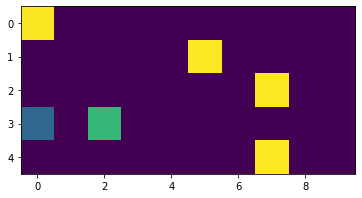

In [50]:
from IPython.display import display

# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
display(pred[0:5])
plt.imshow(pred[0:5])

print("As percent probability")
print(pred[0:5]*100)

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

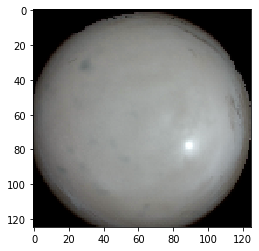

In [46]:
#plt.imshow(x_test[0])
#plt.imshow(x_test[1])
#plt.imshow(x_test[2])
#plt.imshow(x_test[3])
#plt.imshow(x_test[4])
#plt.imshow(x_test[5])

Log loss is calculated as follows:

log loss=−1𝑁∑𝑁𝑖=1(𝑦𝑖log(𝑦̂ 𝑖)+(1−𝑦𝑖)log(1−𝑦̂ 𝑖)) 

The log function is useful to penalizing wrong answers. The following code demonstrates the utility of the log function:

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


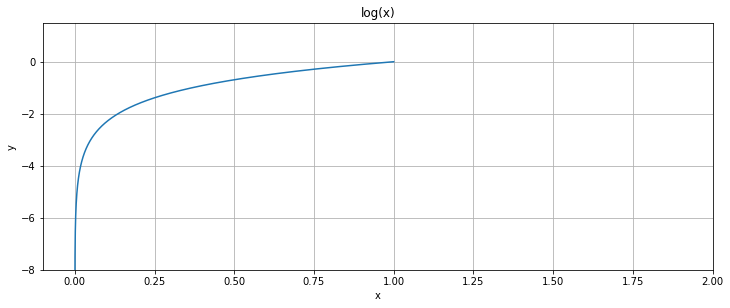

In [51]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import arange, sin, pi

#t = arange(1e-5, 5.0, 0.00001)
#t = arange(1.0, 5.0, 0.00001) # computer scientists
t = arange(0.0, 1.0, 0.00001)  # data     scientists

fig = figure(1,figsize=(12, 10))

ax1 = fig.add_subplot(211)
ax1.plot(t, np.log(t))
ax1.grid(True)
ax1.set_ylim((-8, 1.5))
ax1.set_xlim((-0.1, 2))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('log(x)')

show()

In [52]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='None', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_confusion_matrix2(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[12  0  2  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  1]
 [ 0  0 33  0  0  1  1  0  0  0]
 [ 0  0  1 22  3  0  1  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  1  1  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  1]
 [ 1  0  0  0  0  0  2  0 29  0]
 [ 0  1  0  0  0  0  0  0  0 11]]
Normalized confusion matrix
[[0.86 0.   0.14 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.94 0.   0.   0.   0.   0.   0.   0.   0.06]
 [0.   0.   0.94 0.   0.   0.03 0.03 0.   0.   0.  ]
 [0.   0.   0.04 0.81 0.11 0.   0.04 0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.07 0.07 0.   0.   0.86 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.96 0.   0.04]
 [0.03 0.   0.   0.   0.   0.   0.06 0.   0.91 0.  ]
 [0.   0.08 0.   0.   0.   0.   0.   0.   0.   0.92]]


<Figure size 432x288 with 0 Axes>

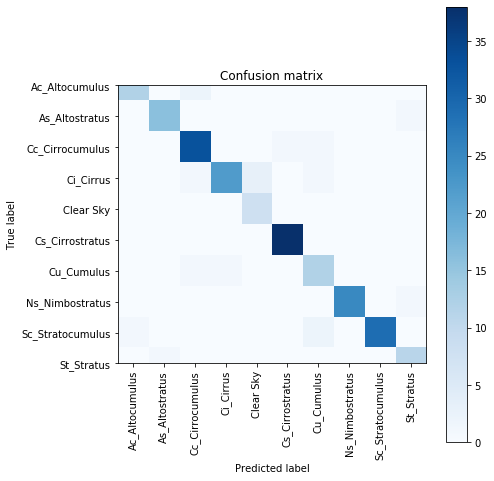

<Figure size 432x288 with 0 Axes>

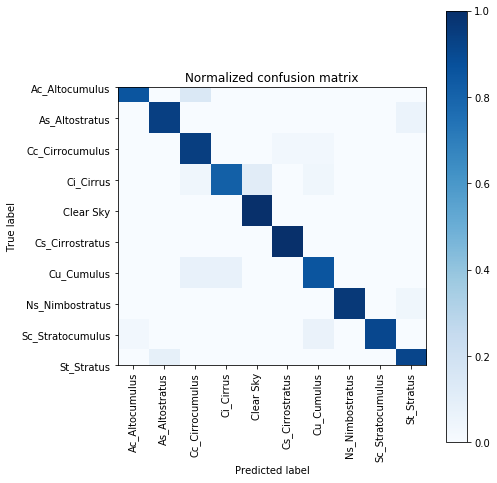

In [53]:
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import itertools
# Compute confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
#plot_confusion_matrix2(cm, CATEGORIES)
plot_confusion_matrix(cm, CATEGORIES)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
#plot_confusion_matrix2(cm_normalized, CATEGORIES, title='Normalized confusion matrix')
plot_confusion_matrix(cm_normalized, CATEGORIES, title='Normalized confusion matrix')

plt.show()